In [84]:
%run utils.ipynb

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Toluca

In [24]:
toluca = pd.read_csv('../Data/toluca.csv')
toluca.shape

(25, 2)

In [25]:
toluca.head(3)

,lotSize,workHours
0,80,399
1,30,121
2,50,221


Text(0.5, 1.0, 'Residual against target')

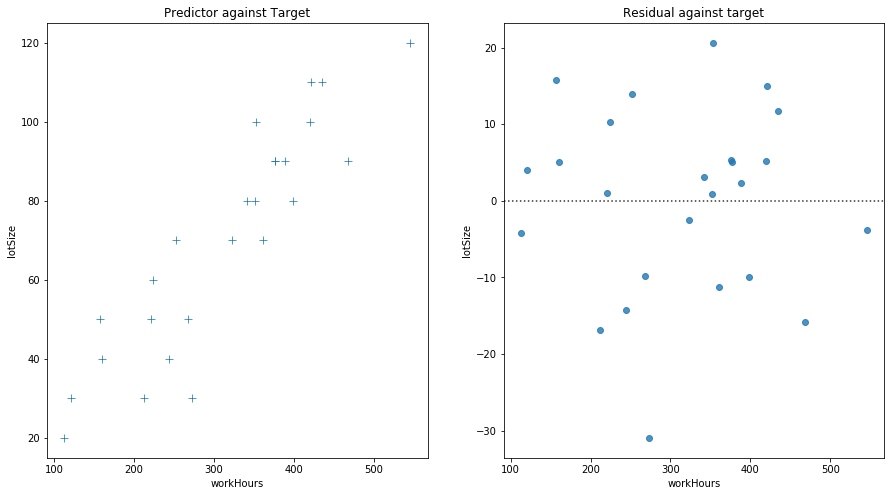

In [80]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='workHours', y='lotSize', data=toluca, marker='+', s=75)
plt.title('Predictor against Target')
plt.subplot(1,2,2)
sns.residplot(x='workHours', y='lotSize', data=toluca)
plt.title('Residual against target')

From the above two plots, we see that there is a linear relationship between the independent and dependent variable. The residual plot shows a random distribution and hence is a good fit for a linear model.

In [78]:
X = toluca[['workHours']]
y = toluca[['lotSize']]
reg = LinearRegression().fit(X, y)
reg.score(X, y).round(3)

0.822

In [76]:
reg.coef_

array([[0.2301084]])

In [77]:
reg.intercept_

array([-1.85825114])

### Equation : y = 0.23*(x)  - 1.858 + error

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


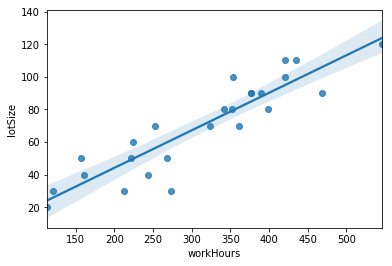

In [56]:
sns.regplot(x='workHours', y='lotSize', data=toluca, fit_reg=True)

# Credit

In [63]:
credit = pd.read_csv('../Data/Credit.csv').drop(columns=['Unnamed: 0'])
credit.shape

(400, 11)

In [64]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [94]:
X = credit[['Income','Rating','Cards','Age','Education']]
y = credit[['Limit']]

## Scatter Plot Between Each Independent Variable

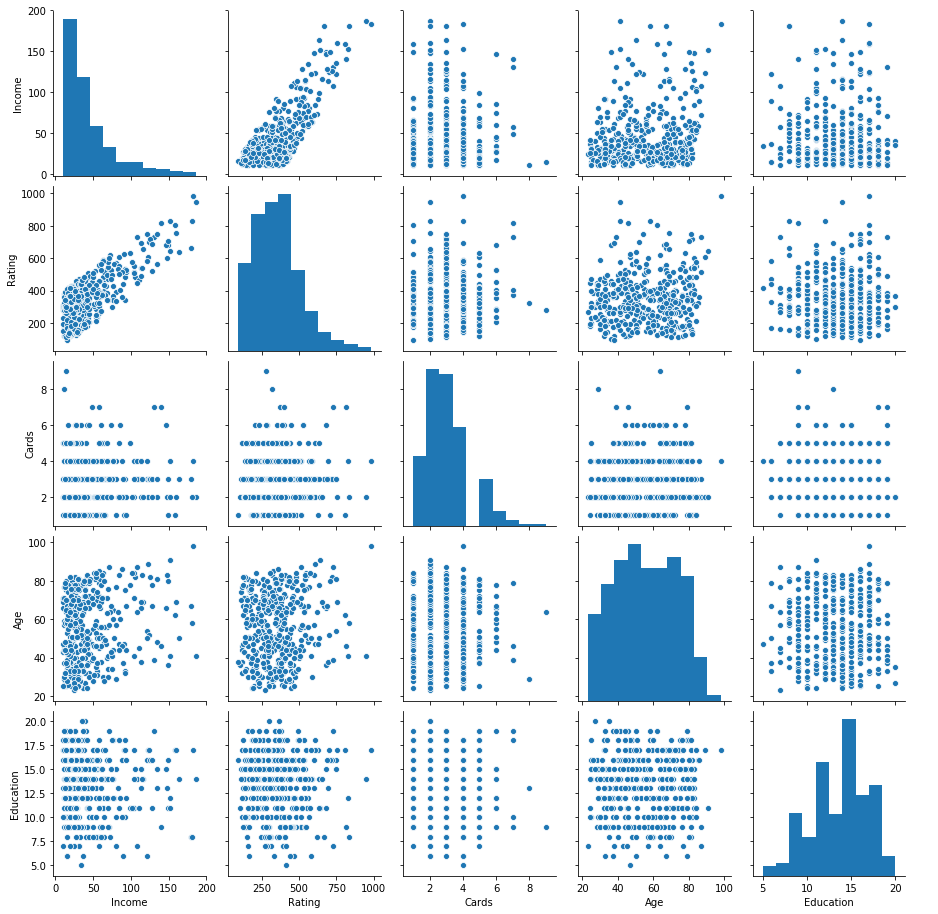

In [66]:
sns.pairplot(X)

## Analysis of each independent variable

In [95]:
r = Regression(X,y, credit)

In [96]:
target = 'Limit'

### Income

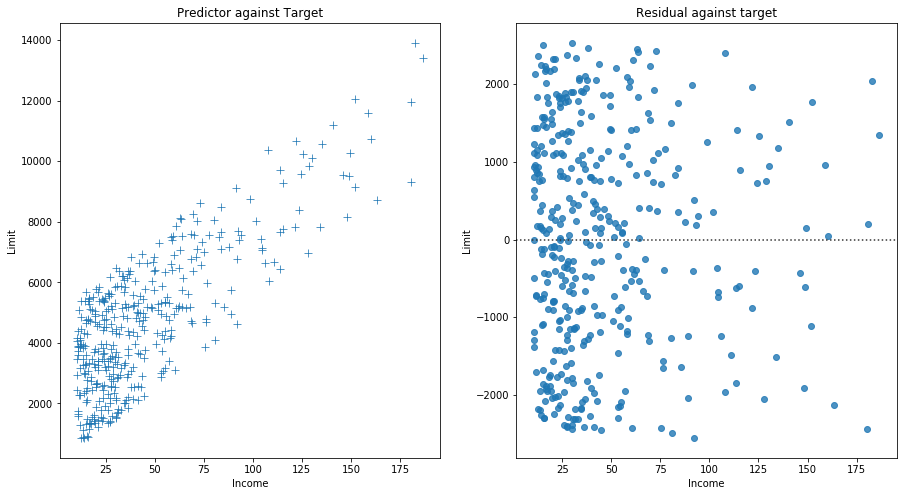

In [97]:
feature = 'Income'
r.plot_scatter_and_residual(feature, target)

In [104]:
reg = LinearRegression().fit(X[[feature]], y)
reg.score(X[[feature]], y).round(3)

0.627

In [105]:
print('Coef : {}\nIntercept : {}'.format(reg.coef_, reg.intercept_))

print('Equation : y = {}*(x) + ({}) + error'.format(reg.coef_[0][0].round(3), reg.intercept_[0].round(3)))

Coef : [[51.8750206]]
Intercept : [2389.86940892]
Equation : y = 51.875*(x) + (2389.869) + error


### Rating

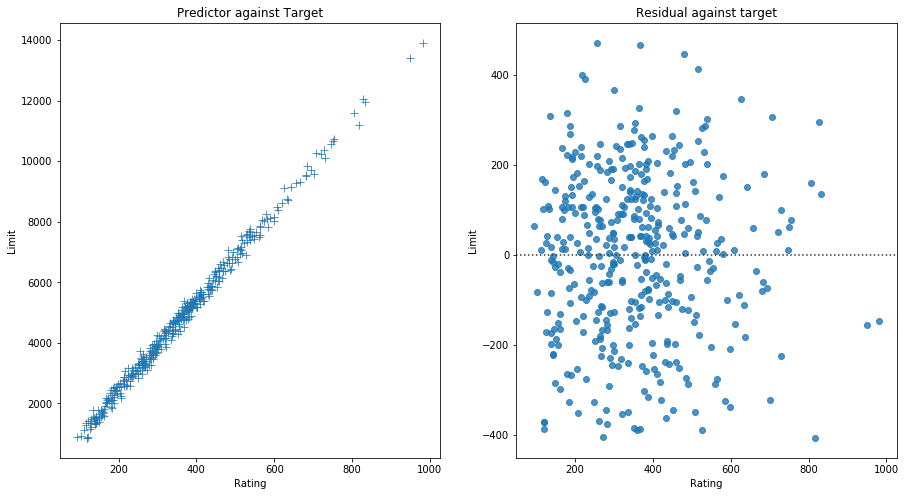

In [106]:
feature = 'Rating'
r.plot_scatter_and_residual(feature, target)

In [107]:
reg = LinearRegression().fit(X[[feature]], y)
reg.score(X[[feature]], y).round(3)

0.994

In [108]:
print('Coef : {}\nIntercept : {}'.format(reg.coef_, reg.intercept_))

print('Equation : y = {}*(x) + ({}) + error'.format(reg.coef_[0][0].round(3), reg.intercept_[0].round(3)))

Coef : [[14.87160712]]
Intercept : [-542.92822999]
Equation : y = 14.872*(x) + (-542.928) + error


### Cards

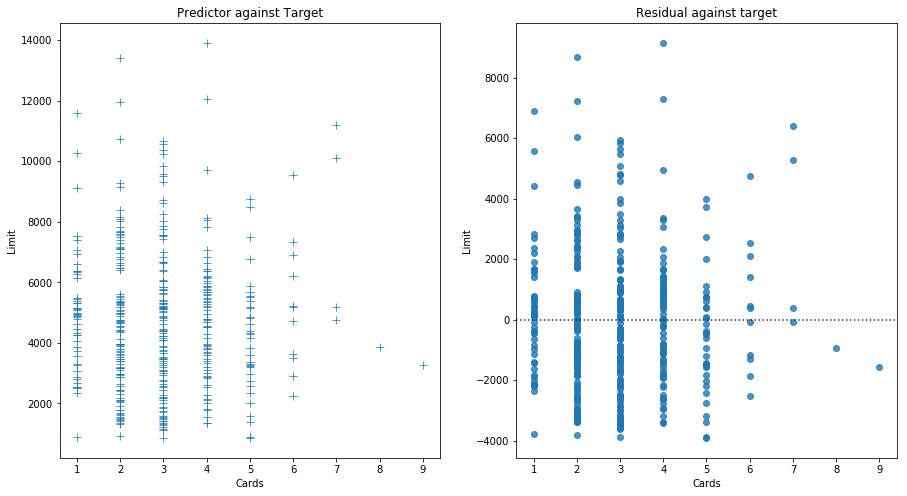

In [109]:
feature = 'Cards'
r.plot_scatter_and_residual(feature, target)

In [110]:
reg = LinearRegression().fit(X[[feature]], y)
reg.score(X[[feature]], y).round(3)

0.0

In [111]:
print('Coef : {}\nIntercept : {}'.format(reg.coef_, reg.intercept_))

print('Equation : y = {}*(x) + ({}) + error'.format(reg.coef_[0][0].round(3), reg.intercept_[0].round(3)))

Coef : [[17.22189457]]
Intercept : [4684.66624682]
Equation : y = 17.222*(x) + (4684.666) + error


### Age

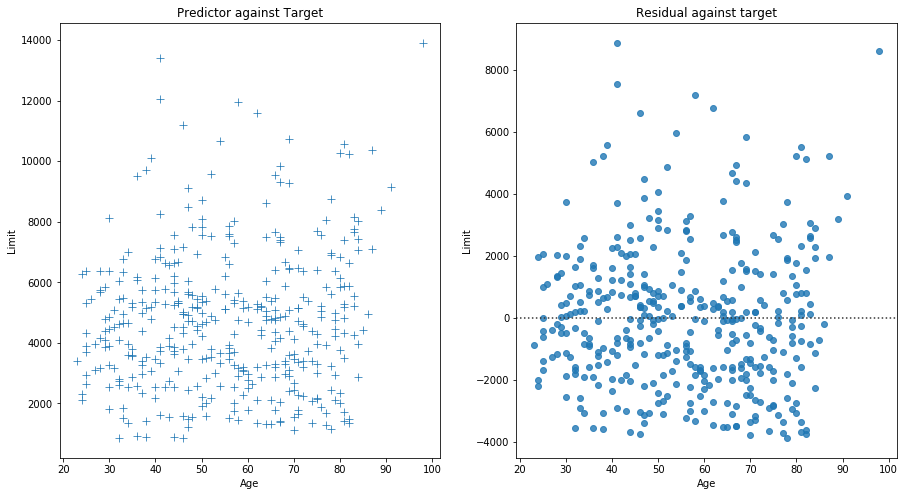

In [112]:
feature = 'Age'
r.plot_scatter_and_residual(feature, target)

In [113]:
reg = LinearRegression().fit(X[[feature]], y)
reg.score(X[[feature]], y).round(3)

0.01

In [114]:
print('Coef : {}\nIntercept : {}'.format(reg.coef_, reg.intercept_))

print('Equation : y = {}*(x) + ({}) + error'.format(reg.coef_[0][0].round(3), reg.intercept_[0].round(3)))

Coef : [[13.49982568]]
Intercept : [3984.09845403]
Equation : y = 13.5*(x) + (3984.098) + error


### Education

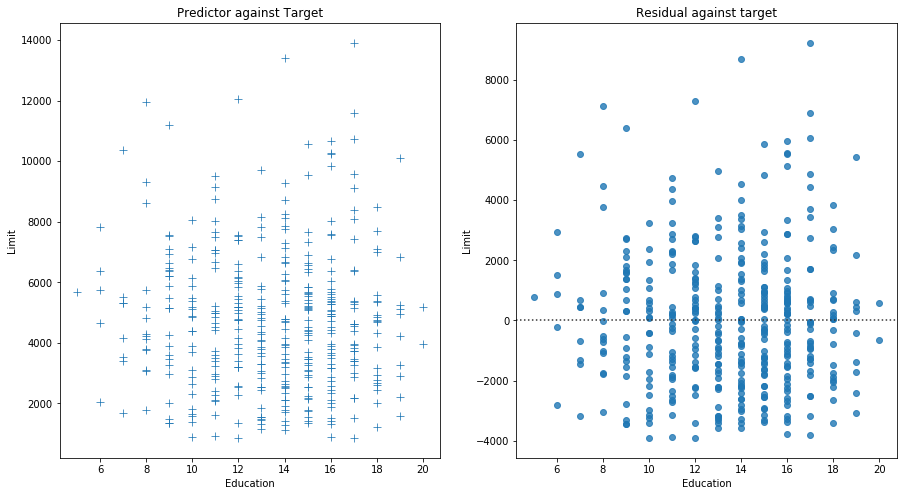

In [115]:
feature = 'Education'
r.plot_scatter_and_residual(feature, target)

In [116]:
reg = LinearRegression().fit(X[[feature]], y)
reg.score(X[[feature]], y).round(3)

0.001

In [117]:
print('Coef : {}\nIntercept : {}'.format(reg.coef_, reg.intercept_))

print('Equation : y = {}*(x) + ({}) + error'.format(reg.coef_[0][0].round(3), reg.intercept_[0].round(3)))

Coef : [[-17.39235309]]
Intercept : [4969.52714909]
Equation : y = -17.392*(x) + (4969.527) + error


### From above analysis independent features like `Income` and `Rating` seem to be best predictors for target `Limit`

### `Cards` & `Income` do not have random residual plots.
### `Age` has a random residual plot but R^2 score is 0.01 (explained variance) and hence is not a good predictor.